In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#Shapely Library
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString

In [4]:
from log_analysis import *
import cw_utils

In [6]:
cw_utils.boto3.__version__

'1.9.199'

In [18]:
stream_name = 'jeremy2-clone'
fname = 'logs/deepracer-{}.log'.format(stream_name)
cw_utils.download_log(fname, stream_prefix=stream_name)

In [19]:
!tail -n 3 $fname

In [10]:
def get_track_waypoints(track_name):
    return np.load("tracks/{}.npy".format(track_name))    

In [13]:
waypoints = get_track_waypoints("Tokyo_Training_track") ### re:invent track
waypoints.shape

(169, 6)

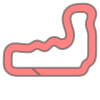

In [14]:
l_center_line = LineString(waypoints[:,0:2])
l_inner_border = LineString(waypoints[:,2:4])
l_outer_border = LineString(waypoints[:,4:6])
road_poly = Polygon(np.vstack((l_outer_border, np.flipud(l_inner_border))))

road_poly

In [24]:
import boto3
stream_prefix = "test"
client = boto3.client('logs')
kwargs = {
    'logGroupName': "/aws/robomaker/SimulationJobs",
    'logStreamNamePrefix': stream_prefix,
    'limit': 10000,
}
kwargs['startTime'] = 1451490400000
kwargs['endTime'] = 2000000000000

while True:
    resp = client.filter_log_events(**kwargs)
    print(resp)
    print(resp['events'])
    try:
        kwargs['nextToken'] = resp['nextToken']
    except KeyError:
        break

{'events': [], 'searchedLogStreams': [], 'ResponseMetadata': {'RequestId': 'e47097df-831a-4919-b070-5b5817f23775', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'e47097df-831a-4919-b070-5b5817f23775', 'content-type': 'application/x-amz-json-1.1', 'content-length': '121', 'date': 'Sun, 11 Aug 2019 14:36:36 GMT'}, 'RetryAttempts': 0}}
[]
